In [1]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime
import tensorflow as tf
import keras
import itertools
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow_addons as tfa
from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import random
import math
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from xgboost import plot_importance

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [2]:
df=pd.read_csv('../input/home-data-for-ml-course/train.csv')
test=pd.read_csv('../input/home-data-for-ml-course/test.csv')
test=test.drop('Id', axis=1)
df=df.drop('Id', axis=1)
df=df.sample(frac=1)
X=df.drop('SalePrice', axis=1)
y=df.SalePrice
x=test
object_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns
total_X=pd.concat([X,x], ignore_index=True)
total_X.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 730 to 78
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [3]:
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

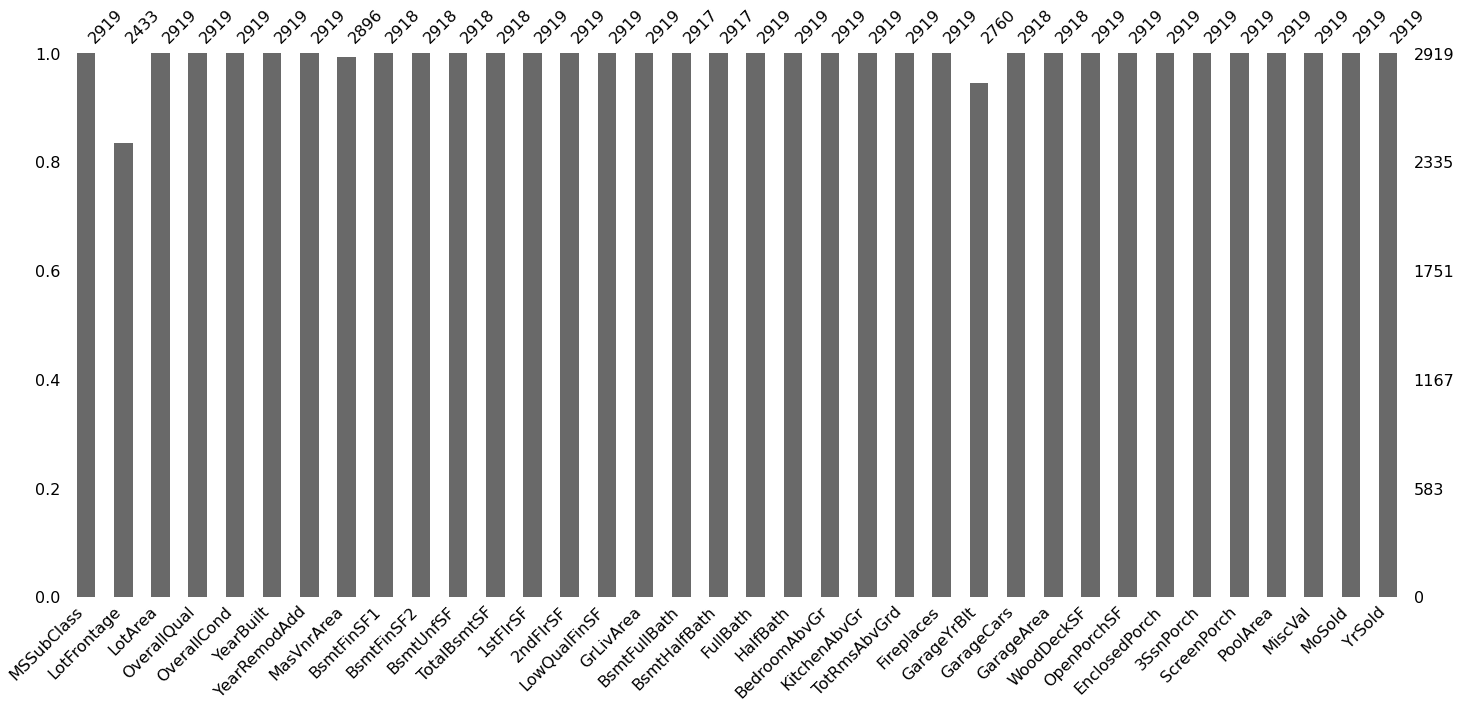

In [4]:
import missingno as msno

msno.bar(total_X[numeric_columns])
plt.show()

In [5]:
total_X[object_columns].isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [6]:
total_X[numeric_columns].isnull().sum()

MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

**Handling of Missing Values for Categorical Features
**

In [7]:
for i in object_columns:
    if(total_X[i].isnull().sum()<=50 & total_X[i].isnull().sum()>0):
        total_X[i]=total_X[i].fillna(total_X[i].mode()[0], inplace = True)
total_X[object_columns]=total_X[object_columns].fillna('NA')


for i in numeric_columns:
    if(total_X[i].isnull().sum()<50 & total_X[i].isnull().sum()>0):
        total_X[i]=total_X[i].fillna(total_X[i].mean())
total_X['LotFrontage']=total_X['LotFrontage'].fillna(0)     
#missing values for garage yr built indicates that garage is not made yet

In [8]:
fig=px.scatter(df,
                 x="GarageYrBlt", y="SalePrice",
                 log_x=True, size_max=20,
                 template='plotly', title="How saleprice varies with year garage was built?",opacity=1)
fig.show()  

In [9]:
total_X['GarageYrBlt']=total_X['GarageYrBlt'].fillna(total_X['GarageYrBlt'].min())
X=total_X.iloc[:len(y),:]
X['SalePrice']=y

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



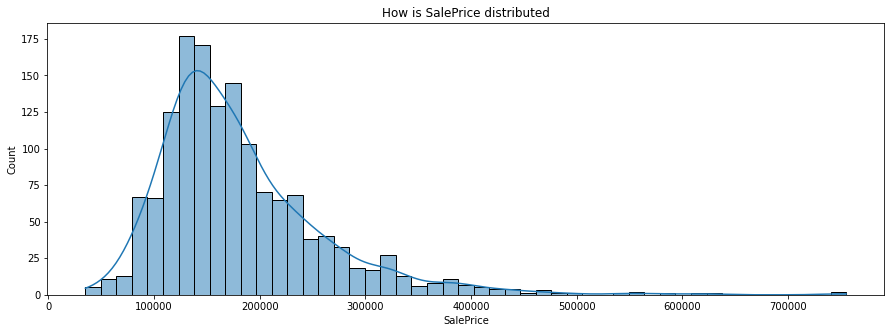

In [10]:
fig, ax=plt.subplots(figsize=(15,5))
sns.histplot(df['SalePrice'],kde=True)
ax.set_title('How is SalePrice distributed')
plt.show()

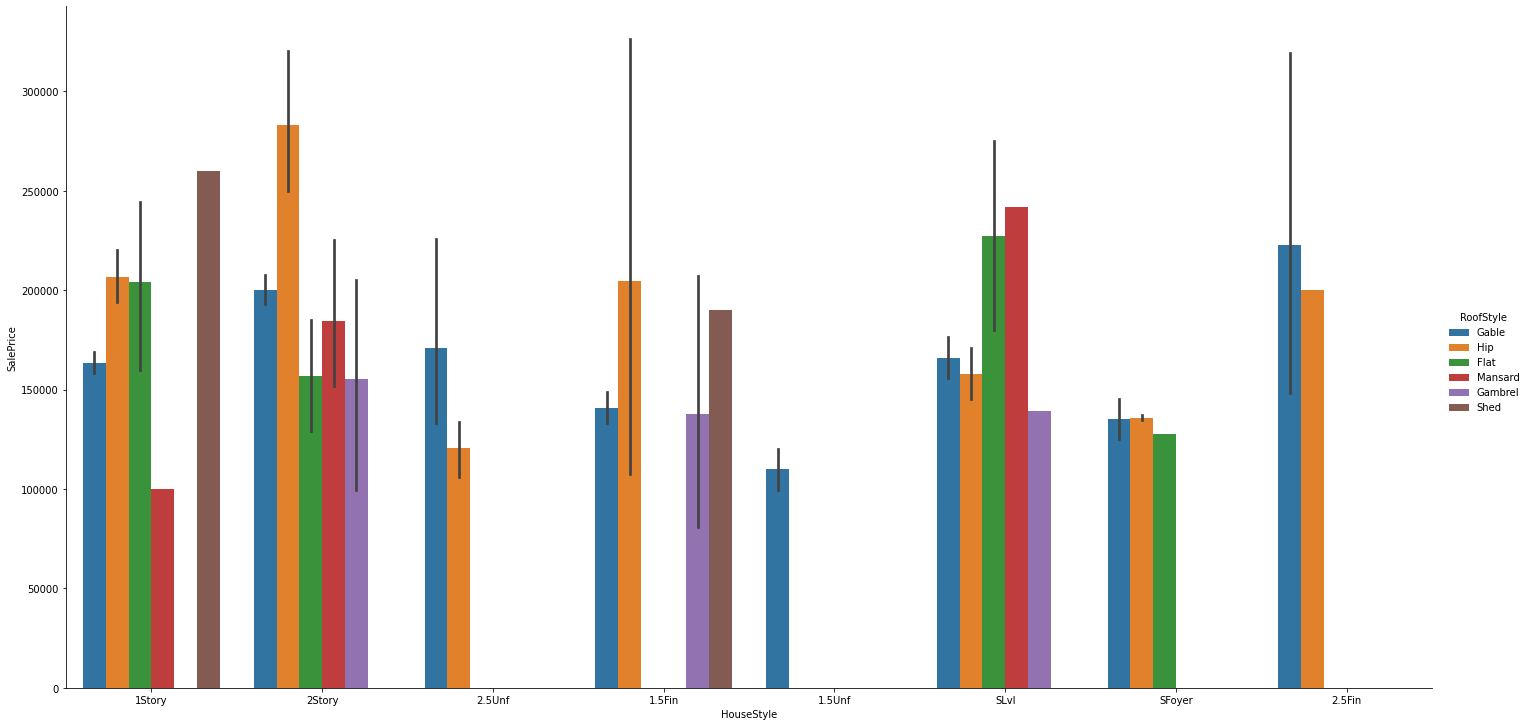

In [11]:
sns.catplot(x = 'HouseStyle', y = 'SalePrice', data = df, kind = 'bar', hue='RoofStyle', height=10, aspect=2)

In [12]:
fig=px.scatter(df,
                 x="LotArea", y="SalePrice",
                 log_x=True, size_max=20,
                 template='plotly', title="How saleprice varies with LotArea?",opacity=0.7, color='YrSold')
fig.show()  

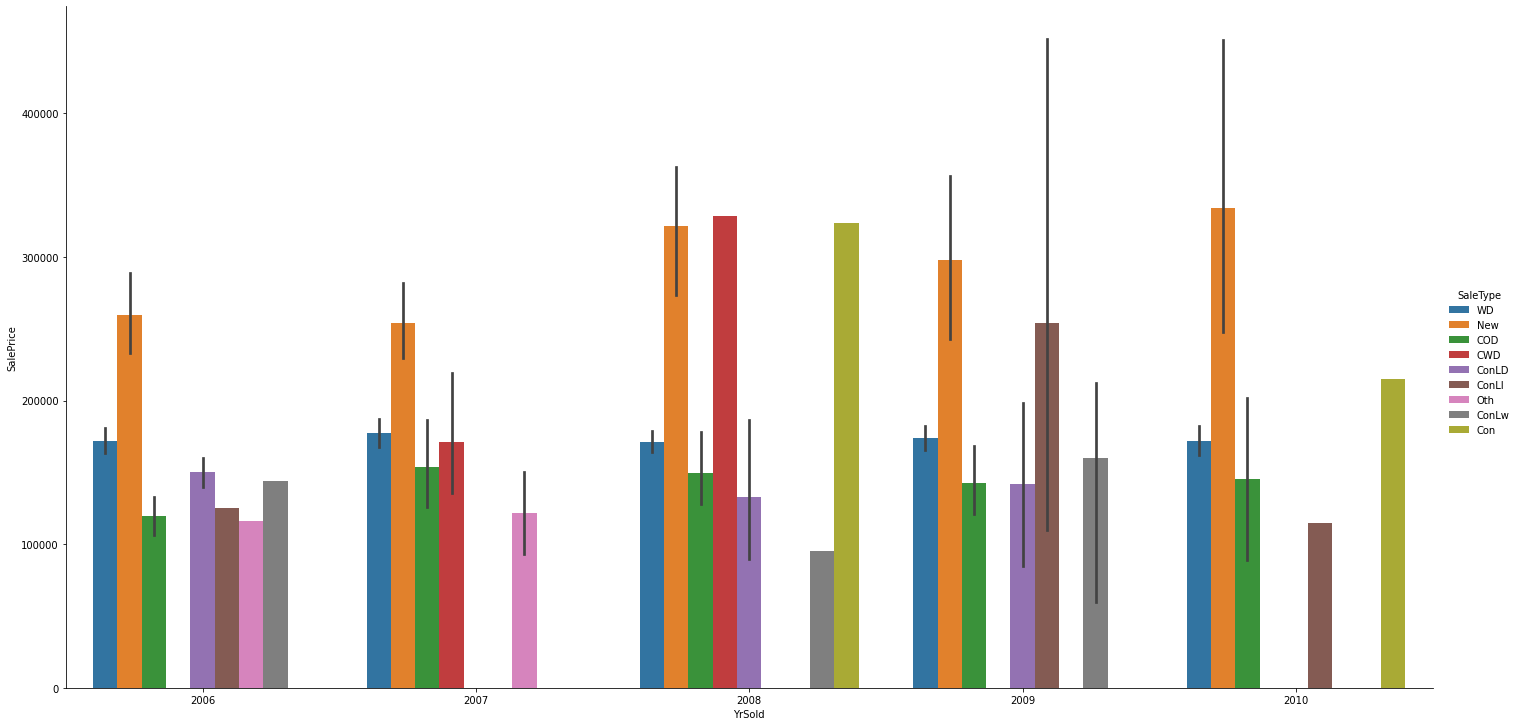

In [13]:
sns.catplot(x = 'YrSold', y = 'SalePrice', data = df, kind = 'bar', hue='SaleType', height=10, aspect=2)

<AxesSubplot:xlabel='YrSold', ylabel='Density'>

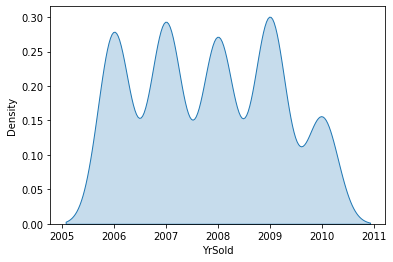

In [14]:
sns.kdeplot(x=X['YrSold'], shade=True)

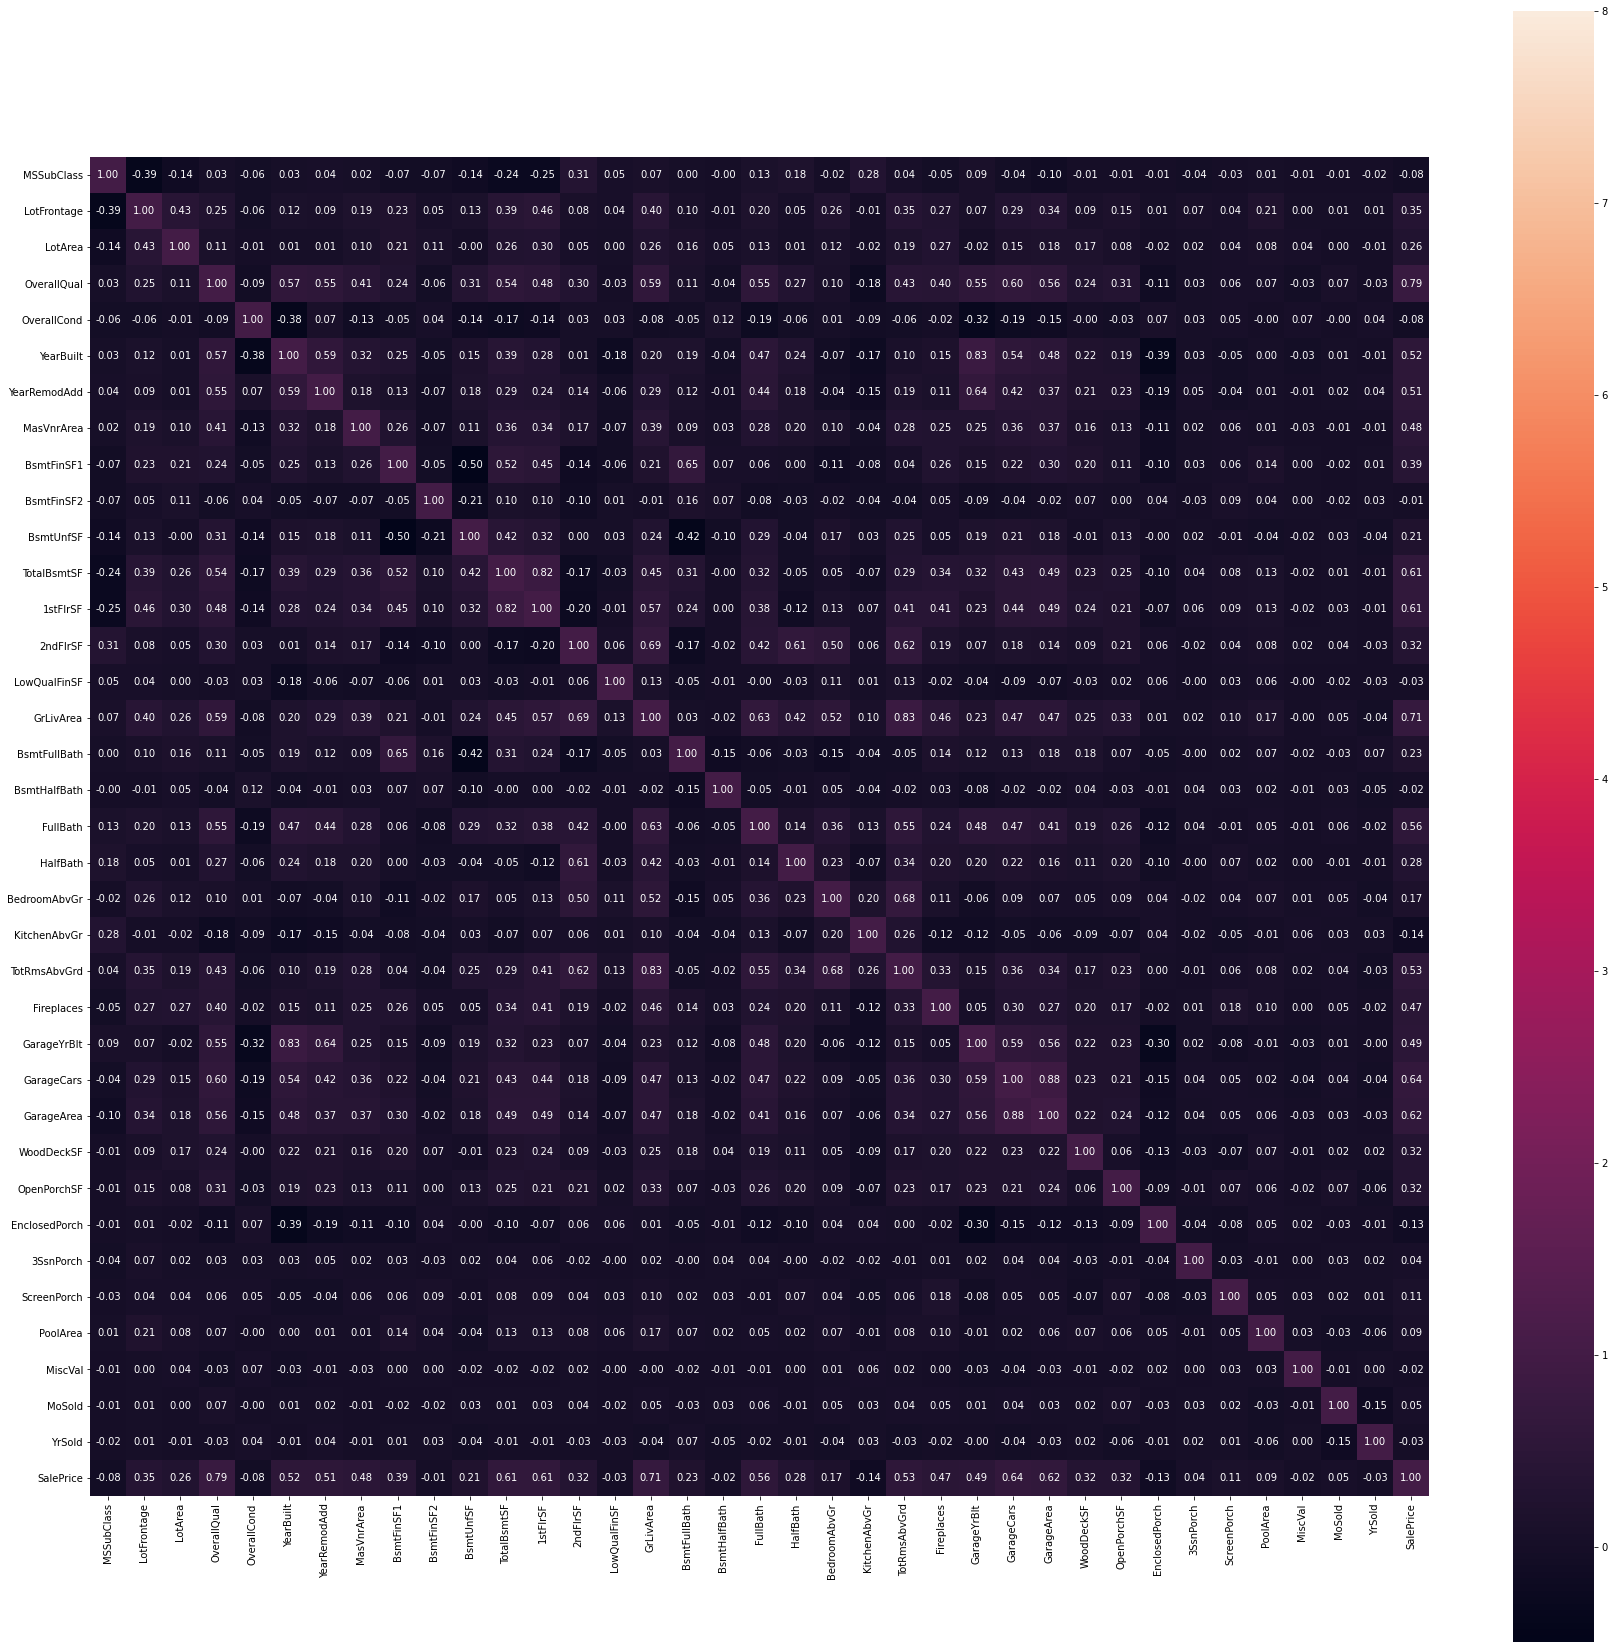

In [15]:
corrmatrix=df.corr()
fig, ax=plt.subplots(figsize=(30,30))
sns.heatmap(corrmatrix, vmax=8, square=True, annot=True, fmt='.2f')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

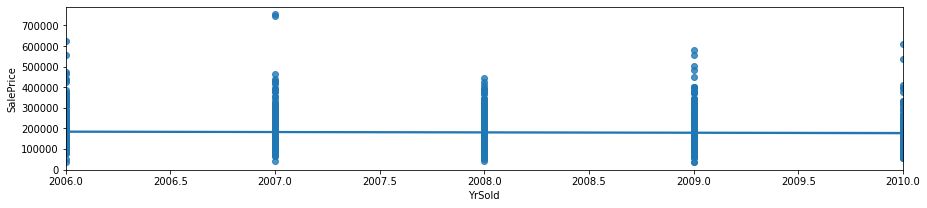

In [16]:
for i in numeric_columns: plt.figure(figsize = (15, 3))

#sns.scatterplot(data=X, x=i, y="SalePrice", hue="CentralAir", fit_reg=True)
sns.regplot(x=i, y="SalePrice", data=df)
plt.show()

**feature generation**

In [17]:
#how much is the age of house can be a good feature
total_X['---**---Age']=total_X['YrSold']-total_X['YearBuilt']
total_X['---**---Garage_Age']=total_X['YrSold']-total_X['GarageYrBlt']
total_X['---**---Age_se']=total_X['YrSold']-total_X['YearRemodAdd']
total_X['---**---full_bath_per_bedroom']=total_X['FullBath']/(total_X['BedroomAbvGr'])
total_X['---**---half_bath_per_bedroom']=total_X['HalfBath']/(total_X['BedroomAbvGr'])
total_X['---**---garage_per_bedroom']=total_X['GarageCars']/(total_X['BedroomAbvGr'])
total_X['---**---kitchen_per_bedroom']=total_X['KitchenAbvGr']/(total_X['BedroomAbvGr'])
total_X['---**---pool_area_per_bedroom']=total_X['KitchenAbvGr']/(total_X['BedroomAbvGr'])
total_X['---**---full_bath_per_bedroom']= total_X['---**---full_bath_per_bedroom'].apply(lambda x: sigmoid(x))
total_X['---**---half_bath_per_bedroom']=total_X['---**---half_bath_per_bedroom'].apply(lambda x: sigmoid(x))
total_X['---**---garage_per_bedroom']=total_X['---**---garage_per_bedroom'].apply(lambda x: sigmoid(x))
total_X['---**---kitchen_per_bedroom']=total_X['---**---kitchen_per_bedroom'].apply(lambda x: sigmoid(x))
total_X['---**---pool_area_per_bedroom']=total_X['---**---pool_area_per_bedroom'].apply(lambda x: sigmoid(x))

In [18]:
total_X['---**---pool_area_per_bedroom'].unique()

array([0.62245933, 0.58257021, 0.5621765 , 0.549834  , 0.73105858,
       0.54157048, 1.        , 0.66075637, 0.81757448, 0.59868766,
       0.5       ])

**encoding**

In [19]:
dummies = pd.get_dummies(total_X[object_columns])
total_X=total_X.drop(object_columns, axis=1)
total_X = pd.concat([total_X, dummies], axis=1, join='inner')
total_X=total_X.drop('MoSold', axis=1)

In [20]:
X=total_X.iloc[:len(y),:]
x=total_X.iloc[len(y):,:]
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1168, Test set:292
Fold:2, Train set: 1168, Test set:292
Fold:3, Train set: 1168, Test set:292
Fold:4, Train set: 1168, Test set:292
Fold:5, Train set: 1168, Test set:292


In [21]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1)
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier



xgb_m = XGBRegressor(n_estimators=1000, random_state=0)
xgb_m.fit(X_train,y_train)
preds=xgb_m.predict(X_validation)
r=mean_squared_error(y_validation, preds, multioutput='raw_values')
math.sqrt(r)

28605.229205572585

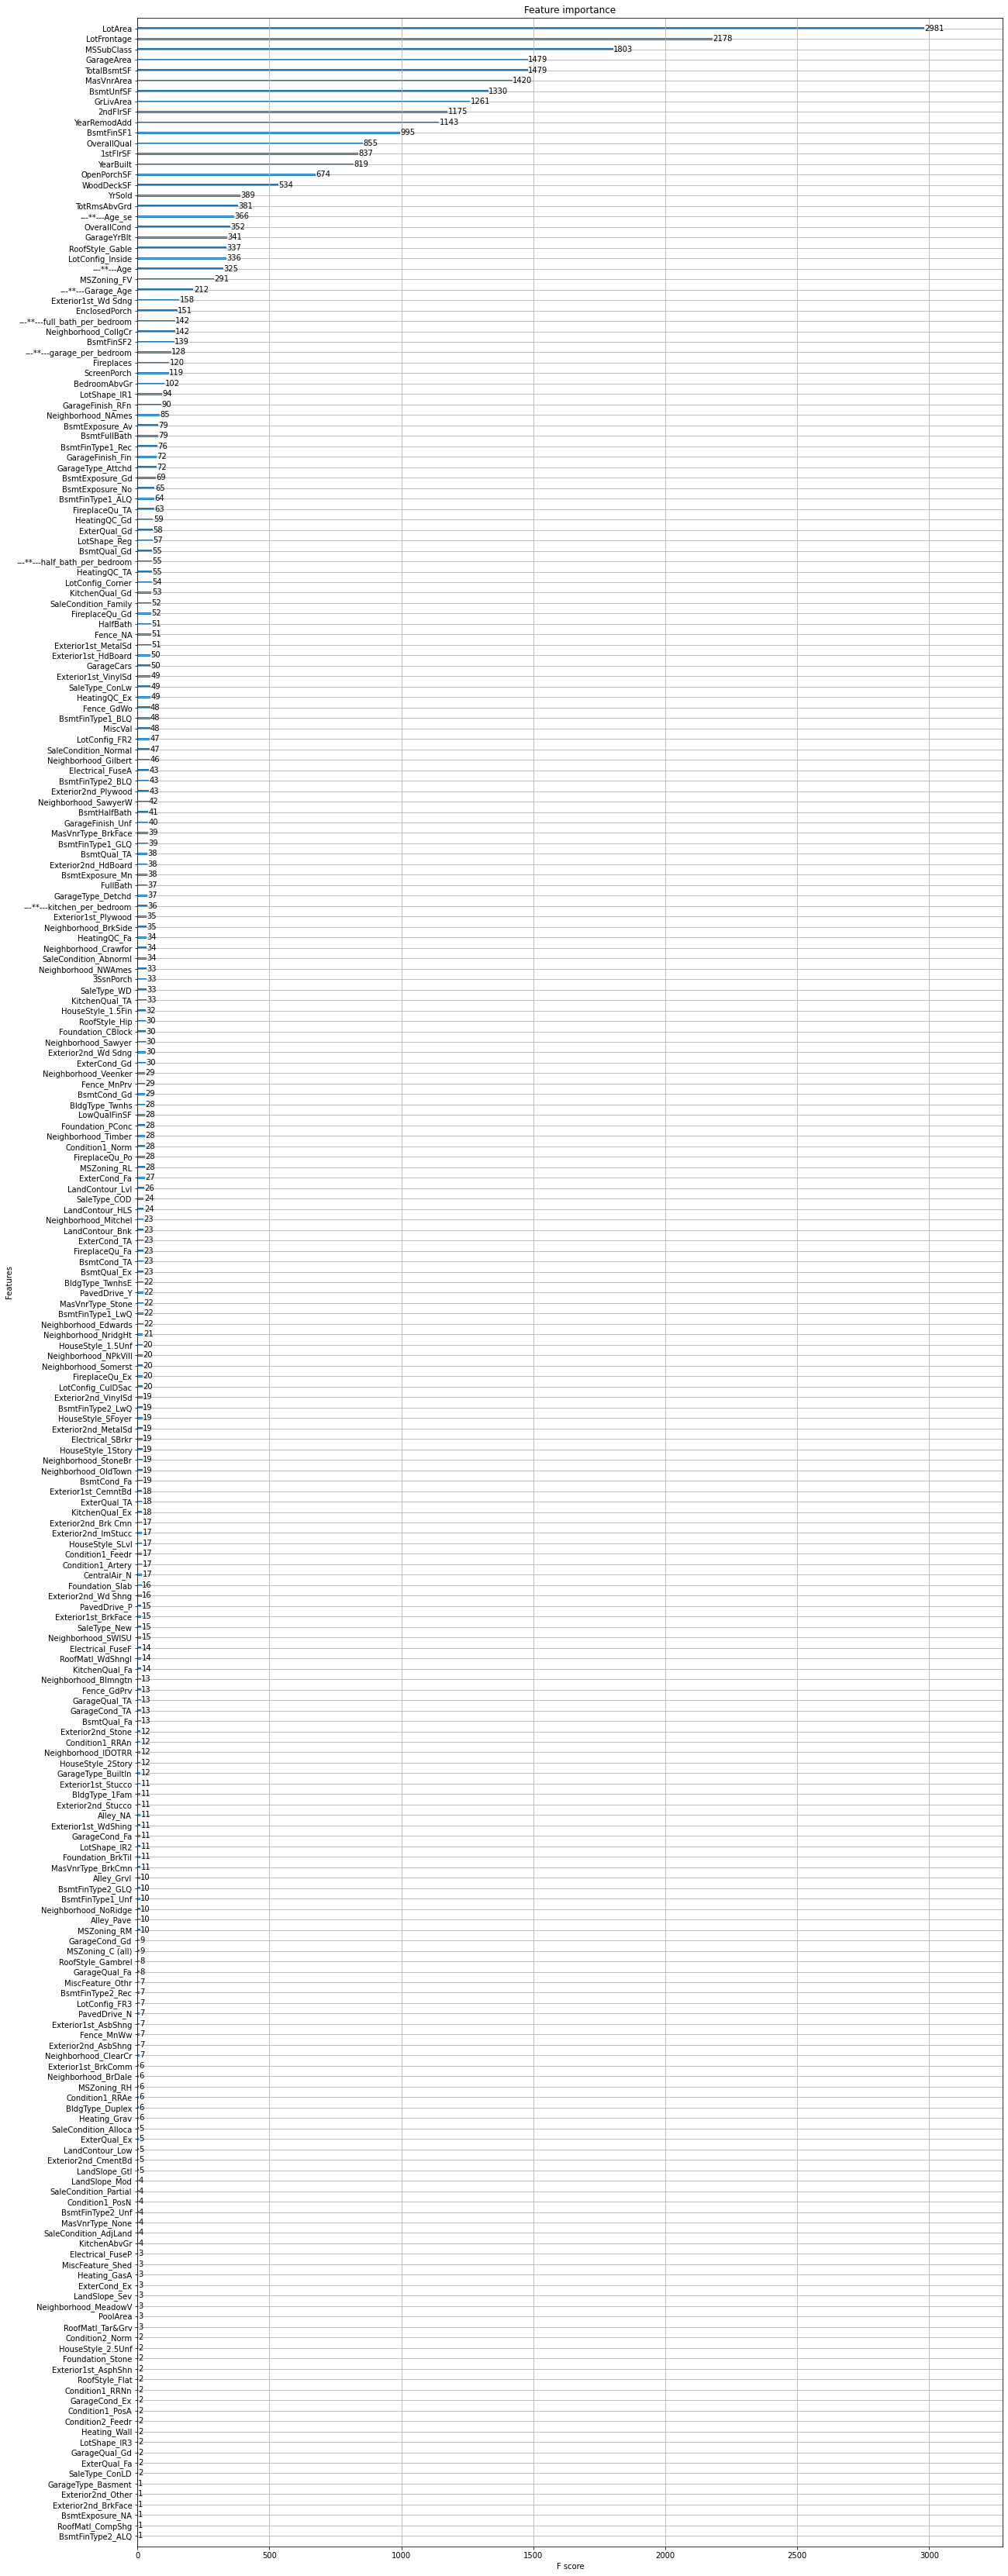

In [22]:
fig, ax=plt.subplots(figsize=(20,60))
plot_importance(xgb_m,ax=ax)
plt.show()

**tuning hyper params**

In [23]:
feature_important = xgb_m.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
dp=data.loc[data['score']<40]
drops=dp.index.to_list()

In [24]:
total_X=total_X.drop(drops,axis=1)
def rmse(score):
    rmse = np.sqrt(-score)
    return rmse
    
def checking(train_X, train_y, val_X, val_y, min_child_weight, n_estimators, max_depth):
    score=1000000
    n_emi=0
    min_chi=0
    model=XGBRegressor()
    max_de=0
    for i in n_estimators:
        for j in min_child_weight:
            for k in max_depth:
                xgb_m = XGBRegressor(min_child_weight=j, n_estimators=i, max_depth=k, random_state=0, tree_method='gpu_hist', gpu_id=0, learning_rate=0.05)
                r = cross_val_score(xgb_m, X, y, cv= kf, scoring="neg_mean_squared_error")
                r=rmse(r.mean())
                if(r<score):
                    score=r
                    n_emi=i
                    min_chi=j
                    model=xgb_m
                    max_de=k
                print("n_estimators = "+str(i)+" and min_child_weight = "+str(j)+" and max_detph = "+str(k)+" gives loss of "+str(r))
    return [model,score, n_emi, min_chi]  

In [25]:
min_child_weight=[1]
max_depth=[2,3,4,5]
n_estimators=[1000,1200,1800,1600,2000]
xt=checking(X_train, y_train, X_validation, y_validation, min_child_weight, n_estimators, max_depth)
print(xt)

n_estimators = 1000 and min_child_weight = 1 and max_detph = 2 gives loss of 25651.473883962826
n_estimators = 1000 and min_child_weight = 1 and max_detph = 3 gives loss of 25603.219016899482
n_estimators = 1000 and min_child_weight = 1 and max_detph = 4 gives loss of 25176.87092750364
n_estimators = 1000 and min_child_weight = 1 and max_detph = 5 gives loss of 25739.260923591664
n_estimators = 1200 and min_child_weight = 1 and max_detph = 2 gives loss of 25625.778799740092
n_estimators = 1200 and min_child_weight = 1 and max_detph = 3 gives loss of 25583.81125288659
n_estimators = 1200 and min_child_weight = 1 and max_detph = 4 gives loss of 25180.33610081852
n_estimators = 1200 and min_child_weight = 1 and max_detph = 5 gives loss of 25743.099501311735
n_estimators = 1800 and min_child_weight = 1 and max_detph = 2 gives loss of 25600.17037974893
n_estimators = 1800 and min_child_weight = 1 and max_detph = 3 gives loss of 25603.866303713818
n_estimators = 1800 and min_child_weight = 1

In [26]:
xt[0].fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [27]:
t_df=pd.read_csv('../input/home-data-for-ml-course/sample_submission.csv')
preds=xt[0].predict(x)
t_df['SalePrice']=preds
import gzip
t_df.to_csv('sub.gz', index=False, compression='gzip')
t_df.head(10)

,Id,SalePrice
0,1461,123300.273438
1,1462,160930.109375
2,1463,185493.031250
3,1464,198815.890625
4,1465,180985.531250
5,1466,175296.328125
6,1467,170709.828125
7,1468,170199.640625
8,1469,185308.843750
9,1470,125097.101562
